In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Assignment_1, Exercise 1: Discrete Fourier Transform

The assignment is divided into two main tasks:
- Task_1: Calculate the Discrete Fourier Transform 
- Task_2: Calculate the inverse of the Discrete Fourier Transform

# Generate a composed signal

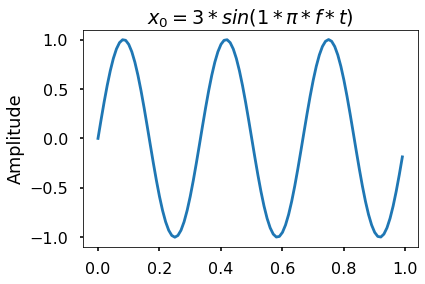

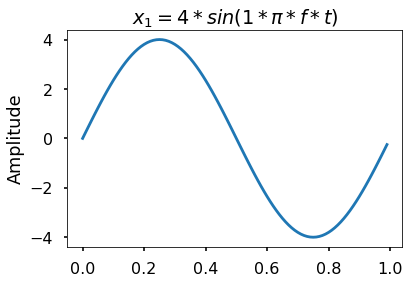

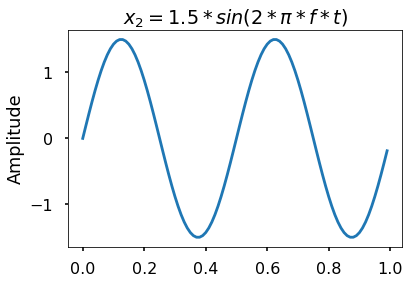

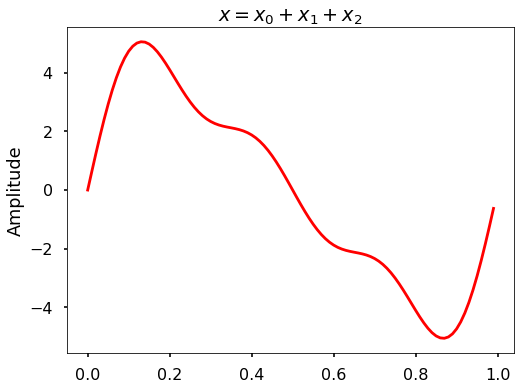

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

#1st. signal
freq = 3.0
x_0 = 1*np.sin(2*np.pi*freq*t)
plt.ylabel('Amplitude')
plt.title("$x_0=3*sin(1*\pi*f*t)$")
plt.plot(t,x_0)
plt.show()
#2nd. signal
freq = 1
x_1= 4*np.sin(2*np.pi*freq*t)
plt.ylabel('Amplitude')
plt.title("$x_1=4*sin(1*\pi*f*t)$")
plt.plot(t,x_1)
plt.show()
#3rd. Signal
freq = 2
x_2= 1.5*np.sin(2*np.pi*freq*t)
plt.ylabel('Amplitude')
plt.title("$x_2=1.5*sin(2*\pi*f*t)$")
plt.plot(t,x_2)

x =x_0+x_1+x_2
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title("$x=x_0+x_1+x_2$")

plt.show()




## Task_1: 

Implement the  DFT(x) function of a singal "x" using the following equation:


$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} $

where:

<ul>
<li>N = number of samples</li>
<li>n = current sample</li>
<li>k = current frequency, where $𝑘∈[0,𝑁−1]$</li>
<li>$x_n=$the sine value at sample n</li>
<li>$X_k=$The DFT which include information of both amplitude and phase</li>
</ul> 

In [3]:


def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    N = len(x)
    i = np.arange(N)
    fs = np.reshape(i, (N, 1))
    c = np.exp(-2.j*np.pi*fs*i/N)
    X = np.dot(c,x)
    return X




## Calculate the frequency

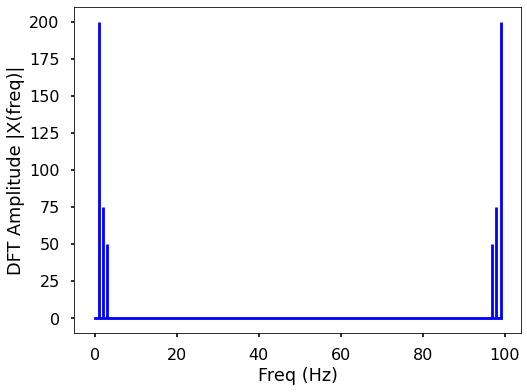

In [4]:


X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()




# Zoom-in the frequencies

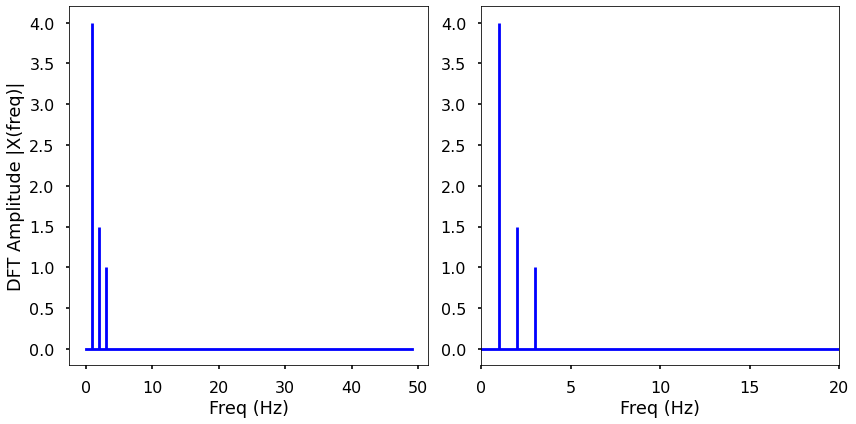

In [5]:

n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()



We can see by plotting the first half of the DFT results, we can see 3 clear peaks at frequency $f_1$ Hz, $f_2$ Hz, and $f_3$ Hz, with amplitude $A_1$, $A_2$, $A_3$ as expected. This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.

# Task_2: The inverse DFT
Implement a function that calculates the inverse of DFT using the following expression:


$x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i\cdot 2\pi{kn/N}}}$

In [6]:

def iDFT(X):
    """
    Function to calculate the inverse 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    #Implement your code here:
    N = len(X)
    n = np.arange(N)
    k = np.reshape(n, (N,1))
    
    c = np.exp(2j * np.pi * k * n / N)
    y = np.dot(c, X)
    y = y / N
    x = np.real(y) + np.imag(y)

    return x

# Plot the reconstructed signal.
The reconstructed signal should be equal to the original one.

Text(0, 0.5, 'f(t)')

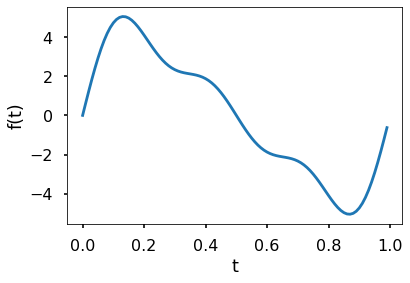

In [7]:
x_reconstructed=iDFT(X)
plt.plot(t,x_reconstructed)
plt.xlabel('t')
plt.ylabel('f(t)')